In [28]:
# Using original Script

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' original script
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '741e458c-4747-4fbc-98a6-56038ba8f7f7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data 
  

{'status': {'timestamp': '2023-12-11T07:59:36.476Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 8871}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10604, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [29]:
# Checking data type
type(data)

dict

In [30]:
import pandas as pd

#This allows you to see all the columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
# This normalizes the data and make it all pretty in the data frame

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10604,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19566675.00000,19566675.00000,False,NaN,1,None,None,None,2023-12-11T07:58:00.000Z,42169.14852,25669630110.36795,61.09370,0.13673,-4.08143,1.78439,13.92017,57.33213,63.35775,825110024105.91028,52.50740,885552118907.48999,None,2023-12-11T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 13:29:43.098675
1,1027,Ethereum,ETH,ethereum,8004,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215621.81613,120215621.81613,True,NaN,2,None,None,None,2023-12-11T07:58:00.000Z,2238.59029,12810930888.52739,30.84270,-0.19534,-4.88780,-0.36503,8.82212,43.60353,41.70804,269113523782.71024,17.11390,269113523782.70999,None,2023-12-11T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 13:29:43.098675
2,825,Tether USDt,USDT,tether,67775,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90545444292.78748,92609080553.05286,True,NaN,3,None,None,None,2023-12-11T07:57:00.000Z,1.00001,52594972979.42528,24.34480,-0.00034,-0.00036,-0.01263,-0.03880,0.00566,0.01837,90546656207.99301,5.76040,92610320089.22000,None,2023-12-11T07:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-11 13:29:43.098675
3,1839,BNB,BNB,bnb,1831,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696661.67373,151696661.67373,False,NaN,4,None,None,None,2023-12-11T07:57:00.000Z,232.35387,831904466.51991,8.94780,-0.38942,-3.35010,0.21759,-6.58847,13.12467,10.94639,35247305945.05614,2.24220,35247305945.06000,None,2023-12-11T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 13:29:43.098675
4,52,XRP,XRP,xrp,1169,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,None,None,None,2023-12-11T07:58:00.000Z,0.62219,1842507259.18503,3.87860,-0.14607,-6.54370,-1.74741,-5.56739,28.82940,31.14338,33571878956.00790,2.13580,62219160202.85000,None,2023-12-11T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 13:29:43.098675
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,426247683.19519,564532238.16982,True,NaN,6,None,None,None,2023-12-11T07:58:00.000Z,68.47276,2871993203.01656,17.40670,-0.84809,-5.42380,7.54878,26.59375,215.83840,281.12698,29186356224.60765,1.85660,38655081665.17000,None,2023-12-11T07:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 13:29:43.098675
6,3408,USDC,USDC,usd-coin,15390,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24494639609.10382,24494639609.10382,False,NaN,7,None,None,None,2023-12-11T07:58:00.000Z,1.00007,5906968649.58322,30.32030,0.00768,0.00905,0.01119,0.02841,-0.00375,-0.03397,24496253747.16873,1.55840,24496253747.17000,None,2023-12-11T07:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-11 13:29:43.098675
7,2010,Cardano,ADA,cardano,996,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35327716123.03800,36424942625.35200,False,NaN,8,None,None,None,2023-12-11T07:57:00.000Z,0.55432,1296803682.23118,-39.37670,1.14498,-6.01244,35.58896,46.73986,125.18245,125.64081,19582852705.21163,1.24580,24944391215.82000,None,2023-12-

In [32]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' original script
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '741e458c-4747-4fbc-98a6-56038ba8f7f7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data 

# Use this if you just want to keep it in a dataframe:

   # df2 = pd.json_normalize(data['data'])
   # df2['timestamp'] = pd.to_datetime('now')
   # df_append = pd.DataFrame(df2)
   # df = pd.concat([df2,df_append])
    
# Use this if you want to create a csv and append data to it:    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\mid9d\OneDrive\Desktop\Projects\Python\Crypto\API.csv'):
        df.to_csv(r'C:\Users\mid9d\OneDrive\Desktop\Projects\Python\Crypto\API.csv', header = 'column_names')
                         
    else:
        df.to_csv(r'C:\Users\mid9d\OneDrive\Desktop\Projects\Python\Crypto\API.csv', mode = 'a', header = False)  

In [60]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep for 1 mins
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [61]:
#Then to read in the file:

df0125 = pd.read_csv(r"C:\Users\mid9d\OneDrive\Desktop\Projects\Python\Crypto\API.csv")
df0125

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10601,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19566568.00000,19566568.00000,False,NaN,1,NaN,NaN,NaN,2023-12-11T06:08:00.000Z,42013.38227,23646665257.88622,44.78560,-0.45294,-4.28712,1.55294,13.31742,56.47044,62.88959,822057701139.52148,52.20570,882281027716.76001,NaN,2023-12-11T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 11:39:19.977085
1,1,1027,Ethereum,ETH,ethereum,8003,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120215621.81613,120215621.81613,True,NaN,2,NaN,NaN,NaN,2023-12-11T06:08:00.000Z,2248.88419,12065605477.29664,19.02530,0.12840,-4.54817,0.31818,9.48867,43.86285,42.17594,270351010853.94183,17.16780,270351010853.94000,NaN,2023-12-11T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 11:39:19.977085
2,2,825,Tether USDt,USDT,tether,67765,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,90545444292.78748,92609080553.05286,True,NaN,3,NaN,NaN,NaN,2023-12-11T06:07:00.000Z,0.99988,49807984867.51304,15.21320,-0.03139,-0.02640,-0.03574,-0.06555,0.02419,0.00083,90534270528.80161,5.75020,92597652125.96001,NaN,2023-12-11T06:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-11 11:39:19.977085
3,3,1839,BNB,BNB,bnb,1831,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151696674.98285,151696674.98285,False,NaN,4,NaN,NaN,NaN,2023-12-11T06:07:00.000Z,233.43289,821125909.30861,5.15460,0.23242,-3.10713,1.65481,-6.15374,13.35417,11.44688,35410992531.26524,2.24960,35410992531.27000,NaN,2023-12-11T06:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 11:39:19.977085
4,4,52,XRP,XRP,xrp,1169,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,NaN,2023-12-11T06:08:00.000Z,0.62616,1769237528.01565,-3.09680,-0.33154,-6.47847,-1.03710,-3.96668,29.60664,31.21249,33786103628.24176,2.14590,62616185320.76000,NaN,2023-12-11T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 11:39:19.977085
5,5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,426247755.83219,564532311.00362,True,NaN,6,NaN,NaN,NaN,2023-12-11T06:08:00.000Z,69.91333,2743923686.85465,3.10150,-0.48674,-4.73721,8.16775,27.77389,221.17264,288.71431,29800398608.73069,1.89280,39468331892.03000,NaN,2023-12-11T06:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-11 11:39:19.977085
6,6,3408,USDC,USDC,usd-coin,15386,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24517029773.45275,24517029773.45275,False,NaN,7,NaN,NaN,NaN,2023-12-11T06:08:00.000Z,0.99999,5519974321.16498,19.32560,-0.01976,-0.01465,0.00124,-0.00336,-0.00118,-0.01554,24516722825.05496,1.55690,24516722825.05000,NaN,2023-12-11T06:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-11 11:39:19.977085
7,7,2010,Cardano,ADA,cardano,996,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35327713506.41500,36424942625.35200,False,NaN,8,NaN,NaN,NaN,2023-12-11T06:07:00.000Z,0.55398,1249106144.83251,-45.26110,-1.18029,-7.28402,35.93127,46.97459,124.38299,125.22624,19570845637.84450,1.24300,24929098611.01000,NaN,2023-12-11T

In [34]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [62]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.42075,-4.39255,1.49549,13.54644,56.85811,62.60260
Ethereum,-0.40608,-5.07121,-0.46207,8.84114,43.42782,41.31745
Tether USDt,-0.00212,-0.01510,0.00389,-0.03306,0.00953,0.01483
BNB,-0.62226,-3.50343,-0.28834,-6.77451,13.12240,10.67808
XRP,-0.77395,-6.71734,-2.40324,-8.47258,29.38244,30.39758
Solana,-2.06642,-5.82889,6.62004,25.96187,216.16042,277.74085
USDC,-0.00172,0.00577,0.04697,0.03490,-0.00383,-0.00853
Cardano,-0.68554,-6.11666,35.51470,45.90406,125.05501,124.52216
Dogecoin,-1.88815,-3.06856,7.83724,22.63681,66.14195,58.29563


In [63]:
# Note: 
# Not necessary but just for visual purpose creating stack
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.42075
              quote.USD.percent_change_24h    -4.39255
              quote.USD.percent_change_7d      1.49549
              quote.USD.percent_change_30d    13.54644
              quote.USD.percent_change_60d    56.85811
              quote.USD.percent_change_90d    62.60260
Ethereum      quote.USD.percent_change_1h     -0.40608
              quote.USD.percent_change_24h    -5.07121
              quote.USD.percent_change_7d     -0.46207
              quote.USD.percent_change_30d     8.84114
              quote.USD.percent_change_60d    43.42782
              quote.USD.percent_change_90d    41.31745
Tether USDt   quote.USD.percent_change_1h     -0.00212
              quote.USD.percent_change_24h    -0.01510
              quote.USD.percent_change_7d      0.00389
              quote.USD.percent_change_30d    -0.03306
              quote.USD.percent_change_60d     0.00953
              quote.US

In [64]:
# check type of stacked dataframe
type(df3)

pandas.core.frame.DataFrame

In [65]:
type(df4)

#Note : As this df type is changed to series we cannot treat it as dataframe so we need to go back to convert it to frame  

pandas.core.series.Series

In [66]:
# Converting df4 to frame from series
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.42075
             quote.USD.percent_change_24h  -4.39255
             quote.USD.percent_change_7d    1.49549
             quote.USD.percent_change_30d  13.54644
             quote.USD.percent_change_60d  56.85811
             quote.USD.percent_change_90d  62.60260
Ethereum     quote.USD.percent_change_1h   -0.40608
             quote.USD.percent_change_24h  -5.07121
             quote.USD.percent_change_7d   -0.46207
             quote.USD.percent_change_30d   8.84114
             quote.USD.percent_change_60d  43.42782
             quote.USD.percent_change_90d  41.31745
Tether USDt  quote.USD.percent_change_1h   -0.00212
             quote.USD.percent_change_24h  -0.01510
             quote.USD.percent_change_7d    0.00389
             quote.USD.percent_change_30d  -0.03306
             quote.USD.percent_change_60d   0.00953
             quote.USD.percent_change_90d   0.01483
BNB          quote.USD.percent_change_1h   -0.62226
             quote.USD.percent_change_24h  -3.50343
             quote.USD.percent_change_7d   -0.28834
             quote.USD.percent_change_30d  -6.77451
             quote.USD.percent_change_60d  13.12240
             quote.USD.percent_change_90d  10.67808
XRP          quote.USD.percent_change_1h   -0.77395
             quote.USD.percent_change_24h  -6.71734
             quote.USD.percent_change_7d   -2.40324
             quote.USD.percent_change_30d  -8.47258
             quote.USD.percent_change_60d  29.38244
             quote.USD.percent_change_90d  30.39758
Solana       quote.USD.percent_change_1h   -2.06642
             quote.USD.percent_change_24h  -5.82889
             quote.USD.percent_change_7d    6.62004
             quote.USD.percent_change_30d  25.96187
             quote.USD.percent_change_60d 216.16042
             quote.USD.percent_change_90d 277.74085
USDC         quote.USD.percent_change_1h   -0.00172
             quote.USD.percent_change_24h   0.00577
             quote.USD.percent_change_7d    0.04697
             quote.USD.percent_change_30d   0.03490
             quote.USD.percent_change_60d  -0.00383
             quote.USD.percent_change_90d  -0.00853
Cardano      quote.USD.percent_change_1h   -0.68554
             quote.USD.percent_change_24h  -6.11666
             quote.USD.percent_change_7d   35.51470
             quote.USD.percent_change_30d  45.90406
             quote.USD.percent_change_60d 125.05501
             quote.USD.percent_change_90d 124.52216
Dogecoin     quote.USD.percent_change_1h   -1.88815
             quote.USD.percent_change_24h  -3.06856
             quote.USD.percent_change_7d    7.83724
             quote.USD.percent_change_30d  22.63681
             quote.USD.percent_change_60d  66.14195
             quote.USD.percent_change_90d  58.29563
Avalanche    quote.USD.percent_change_1h   -3.00642
             quote.USD.percent_change_24h   6.40351
             quote.USD.percent_change_7d   53.52076
             quote.USD.percent_change_30d 144.44366
             quote.USD.percent_change_60d 278.82081
             quote.USD.percent_change_90d 270.73845
TRON         quote.USD.percent_change_1h    0.32283
             quote.USD.percent_change_24h  -2.92365
             quote.USD.percent_change_7d    0.36579
             quote.USD.percent_change_30d  -1.01246
             quote.USD.percent_change_60d  21.74775
             quote.USD.percent_change_90d  33.13157
Polkadot     quote.USD.percent_change_1h   -2.11636
             quote.USD.percent_change_24h  -7.15276
             quote.USD.percent_change_7d   17.49716
             quote.USD.percent_change_30d  27.40578
             quote.USD.percent_change_60d  78.99104
             quote.USD.percent_change_90d  65.31221
Chainlink    quote.USD.percent_change_1h   -1.52185
             quote.USD.percent_change_24h  -8.98898
             quote.USD.percent_change_7d   -7.81085
             quote.USD.percent_change_30d

In [67]:
df5.count()

values    120
dtype: int64

In [68]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.


index = pd.Index(range(120))

# Setting the above DataFrame index object as the index
# using  reset_index() function

df6 = df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.42075
1,Bitcoin,quote.USD.percent_change_24h,-4.39255
2,Bitcoin,quote.USD.percent_change_7d,1.49549
3,Bitcoin,quote.USD.percent_change_30d,13.54644
4,Bitcoin,quote.USD.percent_change_60d,56.85811
5,Bitcoin,quote.USD.percent_change_90d,62.60260
6,Ethereum,quote.USD.percent_change_1h,-0.40608
7,Ethereum,quote.USD.percent_change_24h,-5.07121
8,Ethereum,quote.USD.percent_change_7d,-0.46207
9,Ethereum,quote.USD.percent_change_30d,8.84114


In [69]:
# Renaming column 'level_1'

df7 = df6.rename(columns = {'level_1' : 'percent_change'} )
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.42075
1,Bitcoin,quote.USD.percent_change_24h,-4.39255
2,Bitcoin,quote.USD.percent_change_7d,1.49549
3,Bitcoin,quote.USD.percent_change_30d,13.54644
4,Bitcoin,quote.USD.percent_change_60d,56.85811
5,Bitcoin,quote.USD.percent_change_90d,62.60260
6,Ethereum,quote.USD.percent_change_1h,-0.40608
7,Ethereum,quote.USD.percent_change_24h,-5.07121
8,Ethereum,quote.USD.percent_change_7d,-0.46207
9,Ethereum,quote.USD.percent_change_30d,8.84114


In [70]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','7days','30days','60days','90days'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.42075
1,Bitcoin,24hr,-4.39255
2,Bitcoin,7days,1.49549
3,Bitcoin,30days,13.54644
4,Bitcoin,60days,56.85811
5,Bitcoin,90days,62.60260
6,Ethereum,1hr,-0.40608
7,Ethereum,24hr,-5.07121
8,Ethereum,7days,-0.46207
9,Ethereum,30days,8.84114


In [71]:
# Importing libraries for data visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# set figure size
plt.figure(figsize=(2, 1))
plt.savefig('output_plot.png', dpi=300) 

<Figure size 200x100 with 0 Axes>

C:\Users\mid9d\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


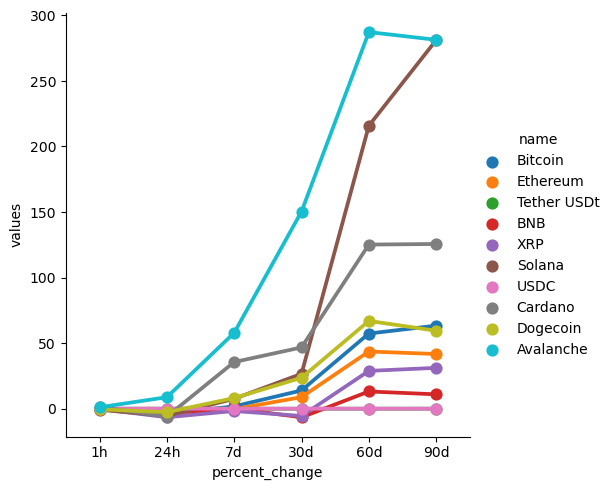

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [73]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,42023.47378,2023-12-11 13:51:29.891829


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

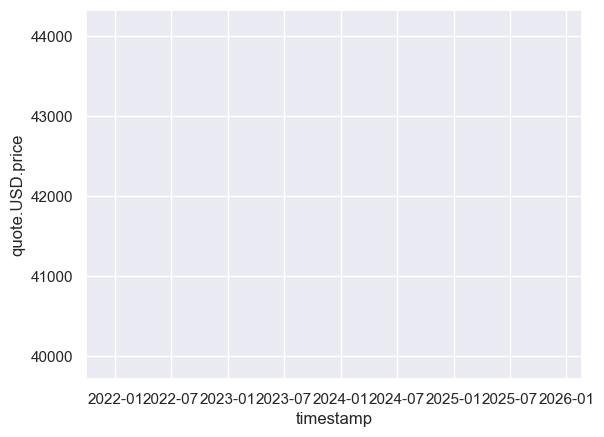

In [74]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)